<a href="https://colab.research.google.com/github/Huynhngocthanh/DoAn_PTDL/blob/main/PTTK_MoTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [15]:
url = "https://raw.githubusercontent.com/Huynhngocthanh/DoAn_PTDL/main/Inc_Exp_Data.csv"
df = pd.read_csv(url)
df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [20]:
dinh_luong = {}
columns_dinh_luong = ['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']
for column in columns_dinh_luong:
    print(column)
    mo_ta = df[column].describe()
    print(mo_ta)
    dinh_luong[column] = df[column]
    print('')

Mthly_HH_Income
count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

Mthly_HH_Expense
count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

Emi_or_Rent_Amt
count       50.000000
mean      3060.000000
std       6241.434948
min          0.000000
25%          0.000000
50%          0.000000
75%       3500.000000
max      35000.000000
Name: Emi_or_Rent_Amt, dtype: float64

Annual_HH_Income
count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64



In [31]:
dinh_tinh = {}
columns_dinh_tinh = ['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members']
for column in columns_dinh_tinh:
    print(column)
    dinh_tinh[column] = df[column]
    print('')

No_of_Fly_Members

Highest_Qualified_Member

No_of_Earning_Members



In [25]:
df['No_of_Fly_Members'].value_counts()

4    15
6    10
3     9
2     8
5     5
7     2
1     1
Name: No_of_Fly_Members, dtype: int64

In [26]:
df['No_of_Earning_Members'].value_counts()

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

In [27]:
df['Highest_Qualified_Member'].describe()

count           50
unique           5
top       Graduate
freq            19
Name: Highest_Qualified_Member, dtype: object

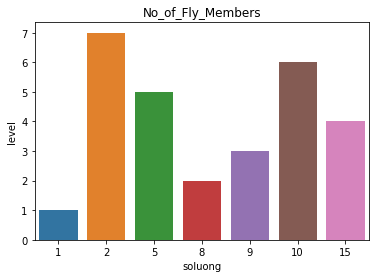

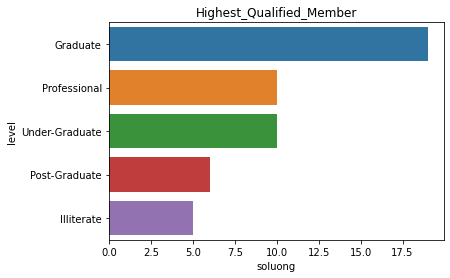

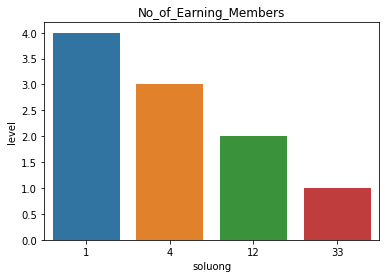

In [43]:
data_dinh_luong = pd.DataFrame(dinh_luong)
data_dinh_tinh = pd.DataFrame(dinh_tinh)
for column in data_dinh_tinh.columns:
    p = {}
    soluong = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh[column].value_counts()
    level = dem_data.index
    for i in dem_data:
        soluong.append(i)
    p = {'level':level, 'soluong':soluong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'level', x= 'soluong', data = data)
    plt.show()

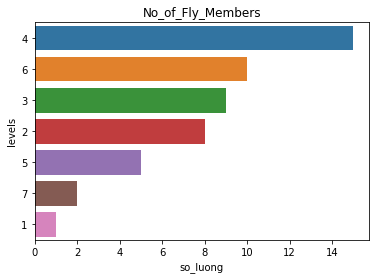

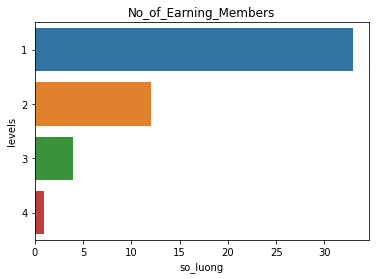

In [45]:
data_dinh_tinh_2 = df[['No_of_Fly_Members','No_of_Earning_Members']]
for column in data_dinh_tinh_2.columns:
    p = {}
    so_luong = []
    levels = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh_2[column].value_counts()
    levels_e = dem_data.index
    for level in levels_e:
        levels.append(str(level))
    for i in dem_data:
        so_luong.append(i)
    p = {'levels':levels, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'levels', x = 'so_luong', data = data)
    plt.show()

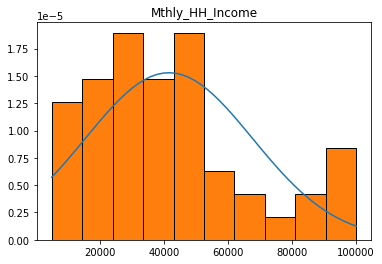

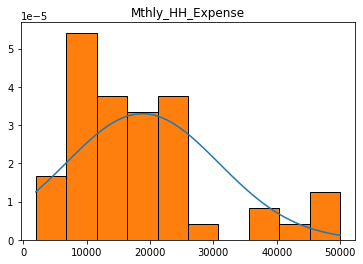

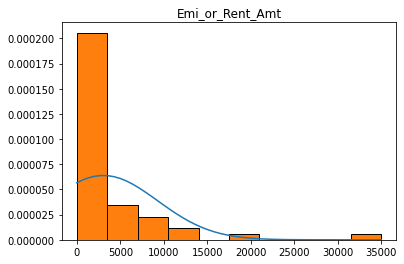

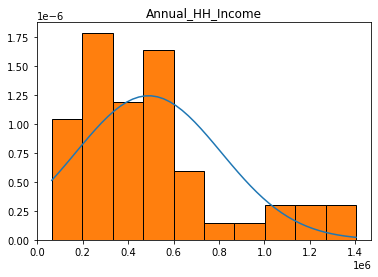

In [50]:
for column in data_dinh_luong.columns:
    data = data_dinh_luong[column]
    # kiem tra data co chuan hay khong?
    mean = np.mean(data)
    # ddof = 1 :: hiệu chỉnh
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    # density = True :: chuẩn hóa dữ liệu vè normal
    plt.hist(data, edgecolor='black', density = True)
    plt.title(column)
    plt.show()